# Regression Project Estimating Home Value
- by Eriberto Contreras

***

# Executive summary

***

# Scenario
You are a junior data scientist on the Zillow data science team and recieve the following email in your inbox:

We want to be able to predict the property tax assessed values ('taxvaluedollarcnt') of Single Family Properties that had a transaction during 2017.

We have a model already, but we are hoping your insights can help us improve it. I need recommendations on a way to make a better model. Maybe you will create a new feature out of existing ones that works better, try a non-linear regression algorithm, or try to create a different model for each county. Whatever you find that works (or doesn't work) will be useful. Given you have just joined our team, we are excited to see your outside perspective.

One last thing, Zach lost the email that told us where these properties were located. Ugh, Zach :-/. Because property taxes are assessed at the county level, we would like to know what states and counties these are located in.

-- The Zillow Data Science Team



# Good Day Zillow team
- I (Eriberto Contreras(junior data scientist)) have created a presentation and a Machine Learning model to predict 2017 taxvaluedollarcnt prices.

# Goals 
- Construct an ML Regression model that predict propery tax assessed values ('taxvaluedollarcnt') of Single Family Properties using attributes of the properties.

- Find the key drivers of property value for single family properties.

- Use the 2017 Zillow data set by combining 2017 prediction, properties and property use type folders from the original data set.

- Make recommendations on what works or doesn't work in prediction these homes' values.

- create a predictive model that is better then the baseline model so we can better predict prices for the year

# Hypothesis
- there is no linear correlation between the calculatedfinishedsquarefeet of a home and taxvaluedollarcnt

- there is no linear correlation between the bathroomcnt of a home and taxvaluedollarcnt

- there is no linear correlation between the bedroomcnt of a home and taxvaluedollarcnt



# Key Takeaways
- Major factors determining property price are:
- calculatedfinishedsquarefeet
- bathroomcnt
- bathroomcnt 
- A LinnearRegression model is the top predictor for this sample of data.

# Plan
- Acquire Data
- Clean and Prep the Data
- Explore the features of the Zillow data
- Evaluate Data
- Test Data

# Conclusion

### Major drivers of the house prices:
    
    calculatedfinishedsquarefeet,bedroomcnt, & bathroomcnt sit at the top as far as drivers of churn.It is a good idea to coniseder that the counties of ventura, Los Angeles, and Orange all have a wide range of homes that can be estimated up to 3 million dollars.The more bedrooms, bathrooms and living squarefeet a home has, the bigger the impact it will have on its price.


### Recommendations for the future:
    
    My recomendation to the zillow team, for future referance and for more accurate predictions; If I can be given more time to explore the data further so that we may be able to improve our predictions. By identifying more factors that drive home prices, we will increase our likelyhood that our predcition model will be more accurate. 
    


# Acquiring the Data

- Zillow Data was obtained from our friends at CodeUp. Information on how to acquire the data can be found on this [link](https://github.com/EribertoContreras/zillow_estimating_home_value/blob/main/acquire.py), please ensure that you have the correct credentials in order to access the data and that they are saved in an env.py file.















# Imports required to run data correctly

In [1]:
import math
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env
from pydataset import data
from scipy.stats import pearsonr, spearmanr
import scipy
import os
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import explained_variance_score
import statsmodels.api as sm
# custom code made and stored in a py file
import acquire
import prepare
# needed for modeling
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

***

# Original Data summary

In [2]:
# retrive original data set from aquire.py 
df = acquire.get_zillow_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52442 entries, 0 to 52441
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         52442 non-null  float64
 1   parcelid                      52442 non-null  int64  
 2   id                            52442 non-null  int64  
 3   airconditioningtypeid         13638 non-null  float64
 4   architecturalstyletypeid      70 non-null     float64
 5   basementsqft                  47 non-null     float64
 6   bathroomcnt                   52442 non-null  float64
 7   bedroomcnt                    52442 non-null  float64
 8   buildingclasstypeid           0 non-null      float64
 9   buildingqualitytypeid         33741 non-null  float64
 10  calculatedbathnbr             52305 non-null  float64
 11  decktypeid                    389 non-null    float64
 12  finishedfloor1squarefeet      4381 non-null   float64
 13  c

***

## What locations are we working with?

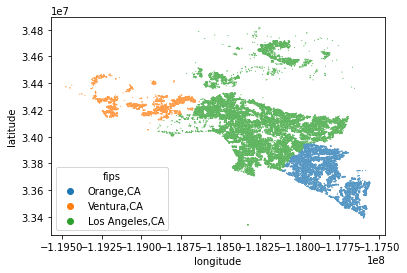

In [3]:
prepare.county_map()

- Fips dictionary [fips](https://www.nrcs.usda.gov/wps/portal/nrcs/detail/ca/home/?cid=nrcs143_013697)
- 6037.0 = Los Angeles,CA
- 6059.0 =      Orange,CA
- 6111.0 =     Ventura,CA

***

## What do information can we comprehend from the visuals?

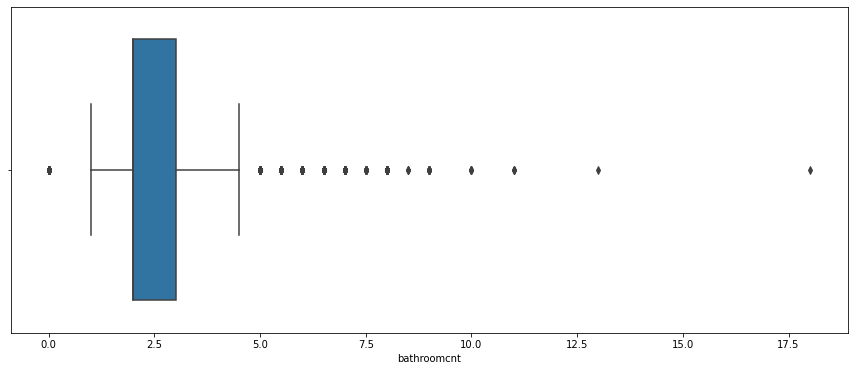

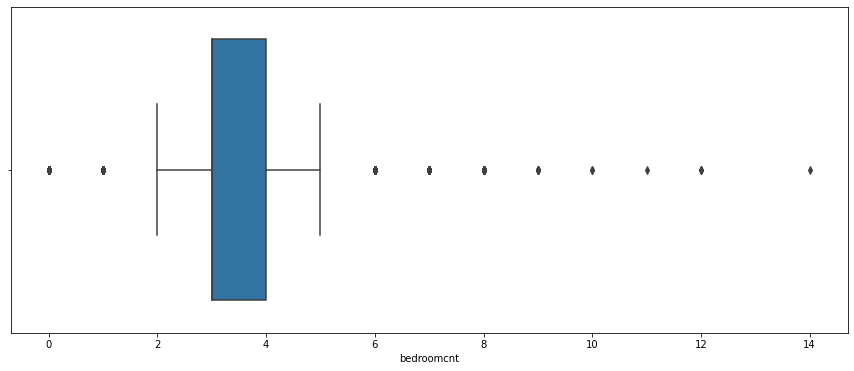

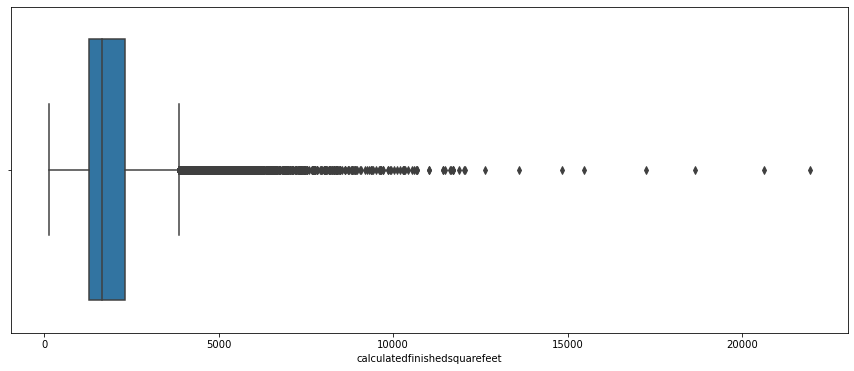

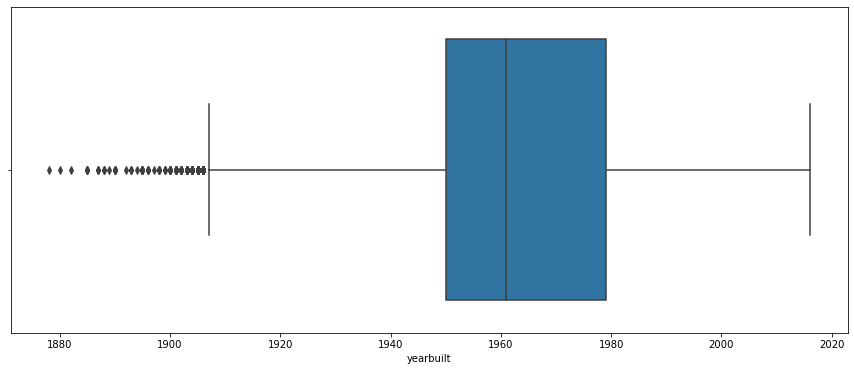

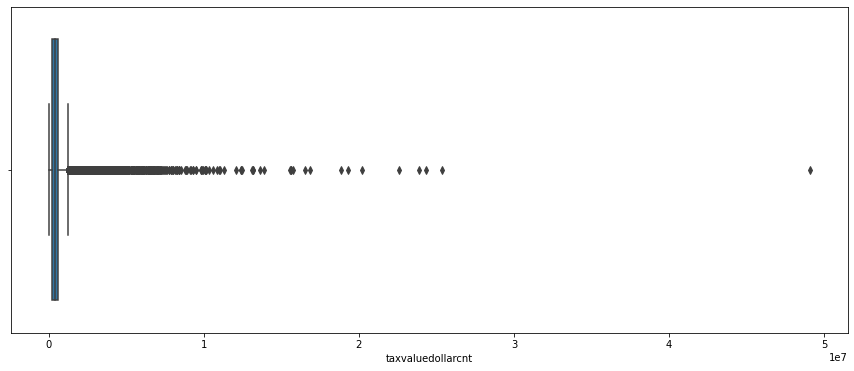

In [4]:
prepare.plots_unclean()

### Takeaways

- We started with 52442 rows of data & 63 columns.
- Homes near the coast line & in the mountain side seem to range over $900k.
- there  seems to be a lot of na values
- I will be removing columns that have an na count over 1000
- I will be keeping calculatefinishedsquarefeet and removing anything other columns that catogorize sq ft.
- I Will be keeping fips and removing anything else that has to do with ZIP Code and region(fips is the county number)
- I will be removing lot sizes, mainly to focus on our calculatefinishedsquarefeet
- I will be removing garages to focus more on the data that is over %50 complete
- I will be getting rid of any id types so that i can work on valid numerical data that can corrilate with the target variable
- We will be focusing on bathroomcnt, bedroomcnt, calculatedfinishedsquarefeet, fips,taxvaluedollarcnt, because those seem to be the top criticals factors that influance home values. [Factors that influance home price](https://www.opendoor.com/w/blog/factors-that-influence-home-value)


***

# Preparing The Data

[Github.Cleaning_data_code](https://github.com/EribertoContreras/zillow_estimating_home_value/blob/main/prepare.py)

In [5]:
df = prepare.clean_zillow_data(df)
df

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,regionidcounty,regionidzip,yearbuilt,taxvaluedollarcnt
1,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,2061.0,97099.0,1967.0,464000.0
2,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,1286.0,97078.0,1962.0,564778.0
3,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,3101.0,96330.0,1970.0,145143.0
4,3.0,4.0,2962.0,6037.0,34145202.0,-118179824.0,3101.0,96293.0,1950.0,773303.0
5,1.0,2.0,738.0,6037.0,34149214.0,-118239357.0,3101.0,96325.0,1922.0,218552.0
...,...,...,...,...,...,...,...,...,...,...
52437,2.0,2.0,1286.0,6037.0,34245368.0,-118282383.0,3101.0,96284.0,1940.0,354621.0
52438,2.0,4.0,1612.0,6111.0,34300140.0,-118706327.0,2061.0,97116.0,1964.0,67205.0
52439,1.0,3.0,1032.0,6037.0,34040895.0,-118038169.0,3101.0,96480.0,1954.0,49546.0
52440,2.0,3.0,1762.0,6037.0,33937685.0,-117996709.0,3101.0,96171.0,1955.0,522000.0


# How does the data difer after removing the outliers

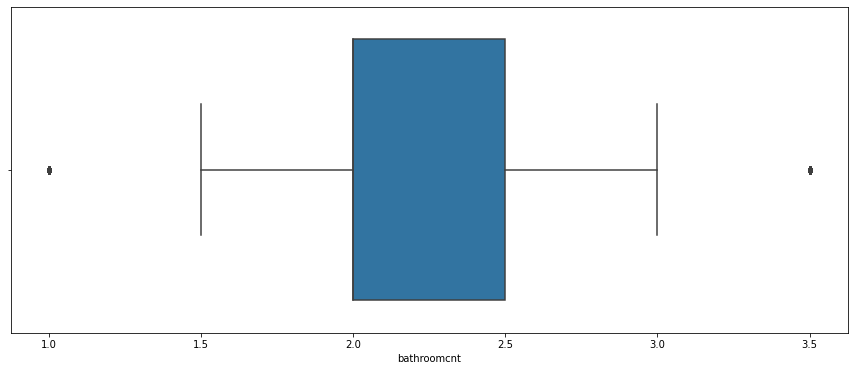

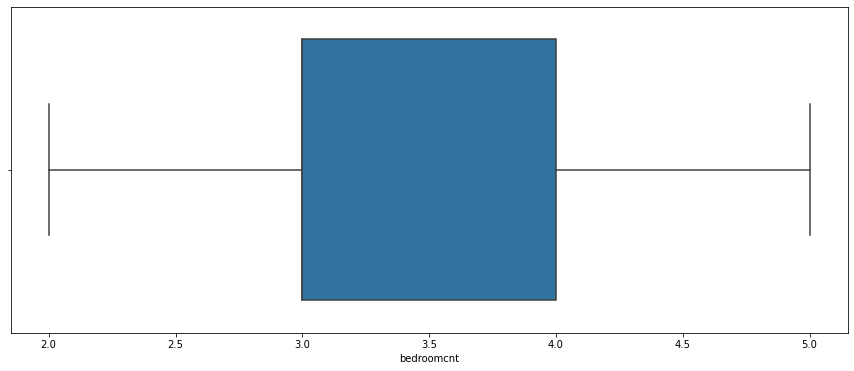

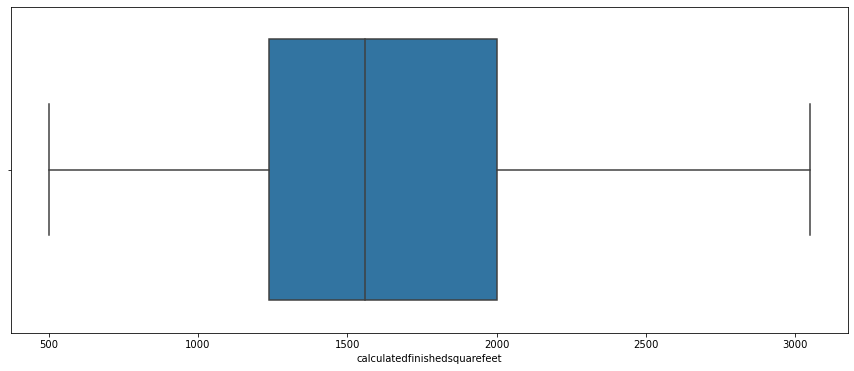

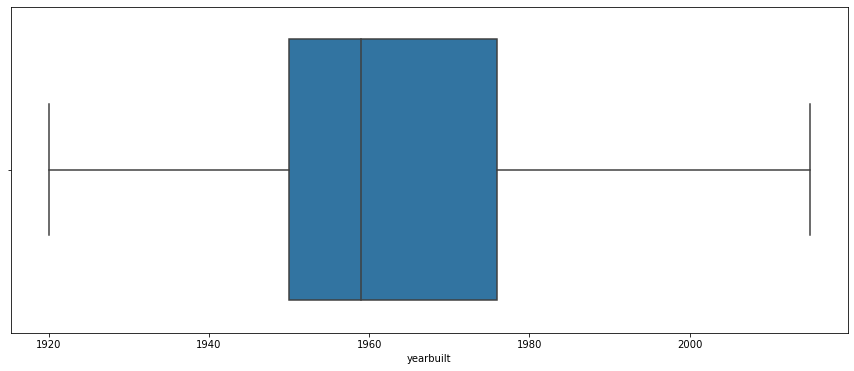

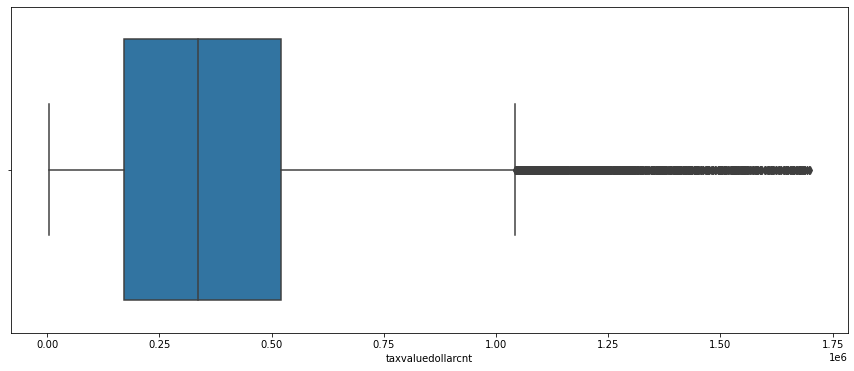

In [6]:
prepare.box_plots_clean_data(df)

### outliers removed
- bedroom count 0
- bathroom count 0
- calculatedfinishedsquarefeet less than 500
- bedroomcnt greater than 6
- bedroomcnt count less than 1
- regionzip equal to 0 
- bathroomcnt greater than 4
- yearbuilt less than 1899
- calculatedfinishedsquarefeet greater than 3050
- taxvaluedollarcnt greater than 1,700,000
- bathroomcnt less than or equal  1
- yearbuilt less than 1919
- yearbuilt greater than or equal to 2015
    

*** 

# DATA EXPLORATION
- Working on Our Most Valuable Payers that affect TaxValueDollarCount

### Spliting my data into train, validate, and test

In [7]:
train, validate, test = prepare.split_zillow_data(df)

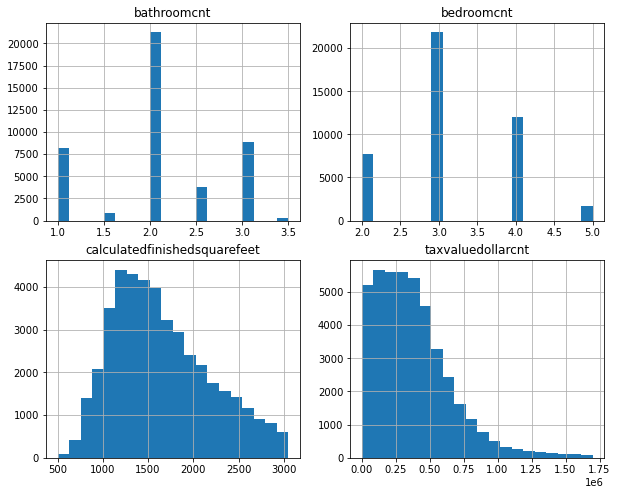

In [8]:
prepare.figure(df)

In [9]:
mvp = df.copy()
mvp.astype(int)

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,regionidcounty,regionidzip,yearbuilt,taxvaluedollarcnt
1,1,2,1465,6111,34449266,-119281531,2061,97099,1967,464000
2,2,3,1243,6059,33886168,-117823170,1286,97078,1962,564778
3,3,4,2376,6037,34245180,-118240722,3101,96330,1970,145143
4,3,4,2962,6037,34145202,-118179824,3101,96293,1950,773303
5,1,2,738,6037,34149214,-118239357,3101,96325,1922,218552
...,...,...,...,...,...,...,...,...,...,...
52437,2,2,1286,6037,34245368,-118282383,3101,96284,1940,354621
52438,2,4,1612,6111,34300140,-118706327,2061,97116,1964,67205
52439,1,3,1032,6037,34040895,-118038169,3101,96480,1954,49546
52440,2,3,1762,6037,33937685,-117996709,3101,96171,1955,522000


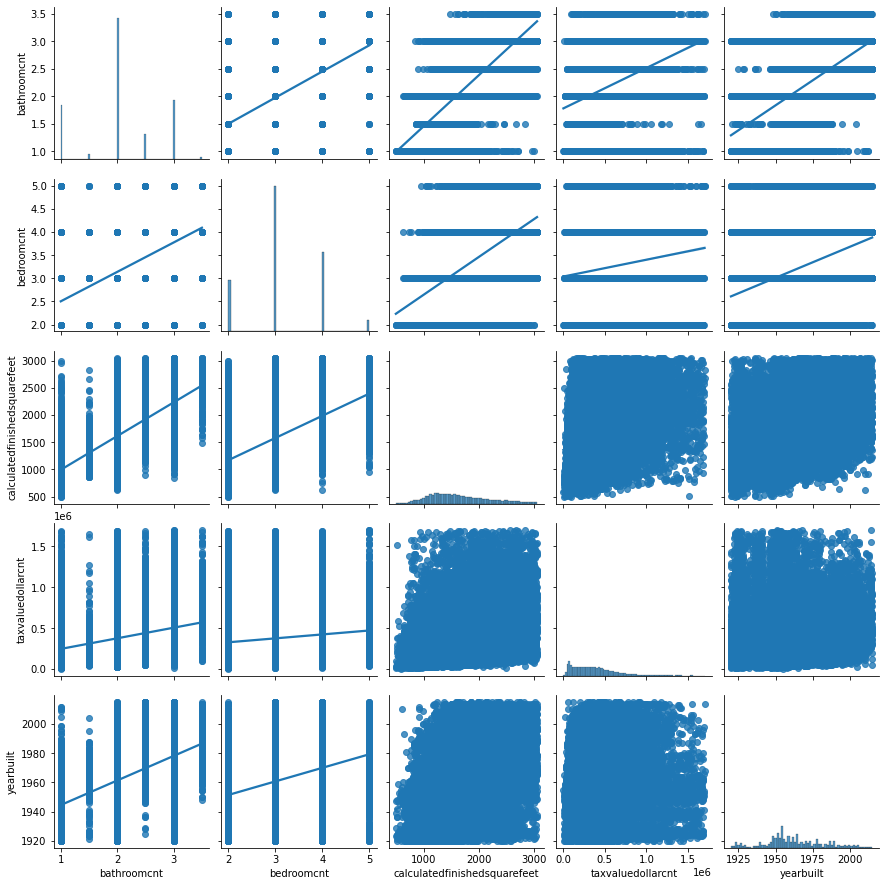

In [10]:
sns.pairplot(mvp,
            x_vars=['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt','yearbuilt'],
            y_vars=['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt','yearbuilt'],
            kind= "reg")

### takeaways
- Based on the charts above we can see that calculatedfinishedsquarefeet has a significant relationship with taxdollarvaluecnt
- bedroomcnt has a mild relationship with taxdollarvaluecnt
- bathroomcnt has a significant relationship with taxdollarvaluecnt

***

<AxesSubplot:xlabel='bathroomcnt', ylabel='taxvaluedollarcnt'>

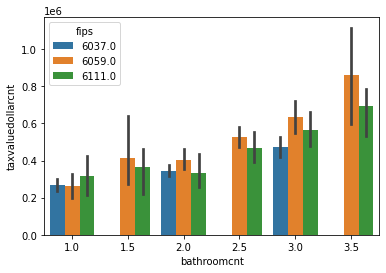

In [11]:
sns.barplot(x = 'bathroomcnt', y='taxvaluedollarcnt', hue = 'fips',data=train.sample(1000))

<AxesSubplot:xlabel='bedroomcnt', ylabel='taxvaluedollarcnt'>

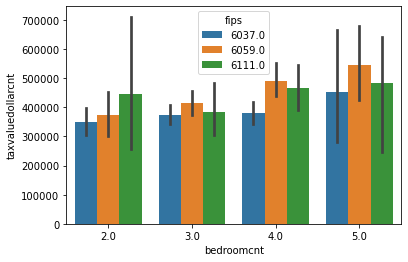

In [12]:
sns.barplot(x = 'bedroomcnt', y='taxvaluedollarcnt', hue = 'fips',data=train.sample(1000))

In [13]:
train.describe()[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt','fips']]

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,fips
count,24248.000000,24248.000000,24248.000000,2.424800e+04,24248.000000
mean,2.058046,3.172798,1650.215111,3.847227e+05,6049.104833
std,0.663678,0.765378,540.830997,2.764241e+05,21.090329
min,1.000000,2.000000,500.000000,9.242000e+03,6037.000000
25%,2.000000,3.000000,1236.000000,1.745400e+05,6037.000000
50%,2.000000,3.000000,1558.000000,3.374050e+05,6037.000000
75%,2.500000,4.000000,2002.000000,5.199752e+05,6059.000000
max,3.500000,5.000000,3049.000000,1.698819e+06,6111.000000


- Calculatedfinishedsqaurefeet has a large differance that has a significant affect on TaxValuedollarcount
- Bathroomcnt has a differance that has a moderate significant affect on TaxValuedollarcount
- Bedroomcnt has a differance that has a moderate significant affect on TaxValuedollarcount

### MVP = are bathroomcnt, bedroomcnt, calculatedfinishedsquarefeet

# Hypothesis testing
## What relationship does the  mvp have with the target variable?

In [14]:
alpha = 0.05

## calculatedfinishedsquarefeet & taxvaluedollarcnt (corr):
Null Hypothesis ${h_0}$ = there is no linear correlation between the calculatedfinishedsquarefeet of a home and taxvaluedollarcnt

Alternative Hypothesis ${h_a}$ = there is a linear correlation between the calculatedfinishedsquarefeet of a home and taxvaluedollarcnt

In [15]:
# corralation with sq ft and tax value dollar count
corr, p = stats.pearsonr(train.calculatedfinishedsquarefeet, train.taxvaluedollarcnt)
corr, p
#correlation test summary
print("correlation:", corr,",","p value:",p)
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

correlation: 0.40099727421323567 , p value: 0.0
Pvalue is: 0.0 is less than alpha: 0.05
Reject the null hypothesis because there is a correlation present


## bathroomcnt & taxvaluedollarcnt (corr):
Null Hypothesis ${h_0}$ = there is no linear correlation between the bathroomcnt of a home and taxvaluedollarcnt

Alternative Hypothesis ${h_a}$ = there is a linear correlation between the bathroomcnt of a home and taxvaluedollarcnt

In [16]:
# corralation with bathroomcnt and tax value dollar count
corr, p = stats.pearsonr(train.bathroomcnt, train.taxvaluedollarcnt)
corr, p
#correlation test summary
print("correlation:", corr,",","p value:",p)
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

correlation: 0.3119308746935817 , p value: 0.0
Pvalue is: 0.0 is less than alpha: 0.05
Reject the null hypothesis because there is a correlation present


## bedroomcnt & taxvaluedollarcnt (corr):
Null Hypothesis ${h_0}$ = there is no linear correlation between the bedroomcnt of a home and taxvaluedollarcnt

Alternative Hypothesis ${h_a}$ = there is a linear correlation between the bedroomcnt of a home and taxvaluedollarcnt

In [17]:
# corralation with bedroomcnt and tax value dollar count
corr, p = stats.pearsonr(train.bedroomcnt, train.taxvaluedollarcnt)
corr, p
#correlation test summary
print("correlation:", corr,",","p value:",p)
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

correlation: 0.13584177525353153 , p value: 3.2656153560955047e-100
Pvalue is: 3.2656153560955047e-100 is less than alpha: 0.05
Reject the null hypothesis because there is a correlation present


### take aways
- there is a linear correlation between the bedroomcnt of a home and taxvaluedollarcnt
- there is a linear correlation between the bathroomcnt of a home and taxvaluedollarcnt
- there is a linear correlation between the calculatedfinishedsquarefeet of a home and taxvaluedollarcnt

***

# spliting and scaling

In [18]:
X_train = train[['calculatedfinishedsquarefeet','bathroomcnt', 'bedroomcnt']]
y_train = train['taxvaluedollarcnt']

X_validate = validate[['calculatedfinishedsquarefeet','bathroomcnt', 'bedroomcnt']]
y_validate = validate['taxvaluedollarcnt']

X_test = test[['calculatedfinishedsquarefeet','bathroomcnt', 'bedroomcnt']]
y_test = test['taxvaluedollarcnt']

In [19]:
scaler, X_train_scaled, X_validate_scaled, X_test_scaled = prepare.scale_data(X_train, X_validate, X_test, return_scaler=True)

***

# Modeling
- Use MinMaxscaler

In [20]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values.
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
# 1. Predict price_pred_mean
taxvaluedollarcnt_pred_mean = y_train.taxvaluedollarcnt.mean()
# creating a taxvalue_pred_mean column for my y_train
y_train['taxvaluedollarcnt_pred_mean'] = y_train.taxvaluedollarcnt.mean()
# creating a taxvalue_pred_mean column for my y_validate
y_validate['taxvaluedollarcnt_pred_mean'] = y_validate.taxvaluedollarcnt.mean()
# 2. compute price_pred_median
# creating a predictive median for y train 
y_train['taxvaluedollarcnt_pred_median'] = y_train.taxvaluedollarcnt.median()
# creating a predictive median for y_validate
y_validate['taxvaluedollarcnt_pred_median'] = y_validate.taxvaluedollarcnt.median()
# 3. RMSE of price_pred_mean
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_mean)**(1/2)
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2),
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))
# 4. RMSE of taxvaluedollarcnt_pred_median
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_median)**(1/2)
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2),
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  276418.44 
Validate/Out-of-Sample:  277181.46
RMSE using Median
Train/In-Sample:  280439.15 
Validate/Out-of-Sample:  281425.87


In [21]:
#predicting y from trained data
#predict rules
model = LinearRegression().fit(X_train_scaled, y_train.taxvaluedollarcnt)
predictions = model.predict(X_train_scaled)

In [22]:
y_test = pd.DataFrame(y_test)

y_test

,taxvaluedollarcnt
42751,520519.0
21269,460811.0
25934,472963.0
47293,408687.0
50195,329291.0
...,...
47199,757000.0
50411,130016.0
46797,551000.0
13963,160633.0


# LinearRegression (ols)

In [23]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train_scaled, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_lm'] = lm.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lm)**(1/2)

# predict validate
y_validate['taxvaluedollarcnt_pred_lm'] = lm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate_lm = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lm)


RMSE for OLS using LinearRegression
Training/In-Sample:  250954.58515555505 
Validation/Out-of-Sample:  254020.8659488386


In [24]:
#residuals
y_train['lm_residuals'] = y_train['taxvaluedollarcnt_pred_lm'] - y_train['taxvaluedollarcnt']
y_validate['lm_residuals'] = y_validate['taxvaluedollarcnt_pred_lm'] - y_validate['taxvaluedollarcnt']


# LassoLars (lars)

In [25]:
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train_scaled, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_lars'] = lars.predict(X_train_scaled)

# evaluate: rmse
rmse_train_lars = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lars)**(1/2)

# predict validate
y_validate['taxvaluedollarcnt_pred_lars'] = lars.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train_lars, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lars)


RMSE for Lasso + Lars
Training/In-Sample:  250954.84367137836 
Validation/Out-of-Sample:  254020.75024149937


In [26]:
#residuals
y_train['lars_residuals'] = y_train['taxvaluedollarcnt_pred_lars'] - y_train['taxvaluedollarcnt']
y_validate['lars_residuals'] = y_validate['taxvaluedollarcnt_pred_lars'] - y_validate['taxvaluedollarcnt']

# TweedieRegressor (GLM)

In [27]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train_scaled, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_glm'] = glm.predict(X_train_scaled)

# evaluate: rmse
rmse_train_glm = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_glm)**(1/2)

# predict validate
y_validate['taxvaluedollarcnt_pred_glm'] = glm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate_glm = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate_glm)


RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  250954.58515555505 
Validation/Out-of-Sample:  254229.36340944044


In [28]:
#residuals
y_train['glm_residuals'] = y_train['taxvaluedollarcnt_pred_glm'] - y_train['taxvaluedollarcnt']
y_validate['glm_residuals'] = y_validate['taxvaluedollarcnt_pred_glm'] - y_validate['taxvaluedollarcnt']

# Polynomial Regression

In [29]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate_scaled)
X_test_degree2 = pf.transform(X_test_scaled)


In [30]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train_lm2 = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lm2)**(1/2)

# predict validate
y_validate['taxvaluedollarcnt_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate_lm2 = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for Polynomial Model, degrees=2
Training/In-Sample:  250954.58515555505 
Validation/Out-of-Sample:  281425.87159613887


In [31]:
#residuals
y_train['poly_residuals'] = y_train['taxvaluedollarcnt_pred_lm2'] - y_train['taxvaluedollarcnt']
y_validate['poly_residuals'] = y_validate['taxvaluedollarcnt_pred_lm2'] - y_validate['taxvaluedollarcnt']

***

# Evaluating regression models

In [32]:
from sklearn.linear_model import LinearRegression
y = pd.DataFrame(y_train.taxvaluedollarcnt)
X = pd.DataFrame(X_train_scaled)
# assuming X and y are already defined
model = LinearRegression().fit(X, y)
train['yhat'] = model.predict(X)
train

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,regionidcounty,regionidzip,yearbuilt,taxvaluedollarcnt,yhat
21620,2.0,2.0,1685.0,6037.0,33986883.0,-118337715.0,3101.0,96024.0,1936.0,264846.0,455947.770099
2407,2.0,3.0,1030.0,6037.0,34047780.0,-117970197.0,3101.0,96490.0,1956.0,153579.0,251325.152302
51380,1.0,2.0,1253.0,6037.0,34124404.0,-118223851.0,3101.0,96046.0,1937.0,479773.0,334108.604749
41843,3.0,4.0,2034.0,6111.0,34302133.0,-118754068.0,2061.0,97118.0,2005.0,634530.0,448620.263748
44774,2.0,3.0,1557.0,6037.0,33906300.0,-118127339.0,3101.0,96208.0,1950.0,245376.0,371619.694414
...,...,...,...,...,...,...,...,...,...,...,...
16906,2.0,3.0,1143.0,6037.0,34205157.0,-118514120.0,3101.0,96415.0,1950.0,56691.0,277118.858675
13577,2.5,4.0,2297.0,6111.0,34188159.0,-119205314.0,2061.0,97106.0,1969.0,82676.0,497038.604550
13023,2.0,3.0,1937.0,6059.0,33457060.0,-117639428.0,1286.0,96983.0,1984.0,81767.0,458359.591953
46246,2.0,4.0,1636.0,6037.0,33989390.0,-117983680.0,3101.0,96489.0,1973.0,485955.0,334542.036600


In [33]:
df = pd.DataFrame(train[['calculatedfinishedsquarefeet','bathroomcnt','bedroomcnt','taxvaluedollarcnt','yhat']])
df.head()

,calculatedfinishedsquarefeet,bathroomcnt,bedroomcnt,taxvaluedollarcnt,yhat
21620,1685.0,2.0,2.0,264846.0,455947.770099
2407,1030.0,2.0,3.0,153579.0,251325.152302
51380,1253.0,1.0,2.0,479773.0,334108.604749
41843,2034.0,3.0,4.0,634530.0,448620.263748
44774,1557.0,2.0,3.0,245376.0,371619.694414


# Baseline = 384722

In [34]:
#creating a baseline from the mean of the target variable
baseline = y.mean()
df['baseline'] = y.taxvaluedollarcnt.mean()
# turning baseline to int from float
df.baseline = df.baseline.astype(int)
# residual = actual - predicted
df['residual'] = df.taxvaluedollarcnt - df.yhat
df['baseline_residual'] = df.taxvaluedollarcnt - df.baseline

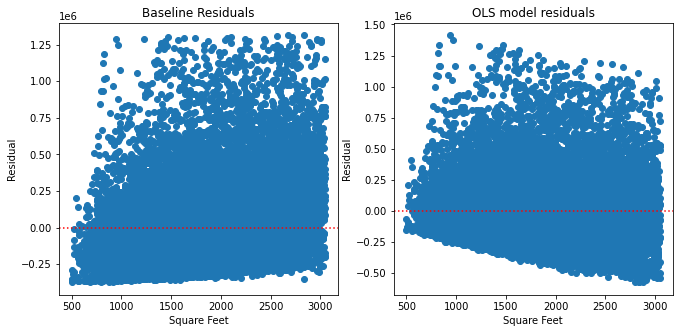

In [35]:
# residual plots (x vs residual)

plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(df.calculatedfinishedsquarefeet, df.baseline_residual)
plt.axhline(y = 0, ls = ':', color='red')
plt.xlabel('Square Feet')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(df.calculatedfinishedsquarefeet, df.residual)
plt.axhline(y = 0, ls = ':', color ='red')
plt.xlabel('Square Feet')
plt.ylabel('Residual')
plt.title('OLS model residuals');


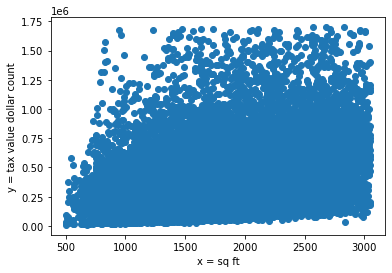

In [36]:
y = pd.DataFrame(df.taxvaluedollarcnt)
X = pd.DataFrame(df.calculatedfinishedsquarefeet)
# look at scatter of x vs y
plt.scatter(X, y)
plt.xlabel('x = sq ft')
plt.ylabel('y = tax value dollar count');

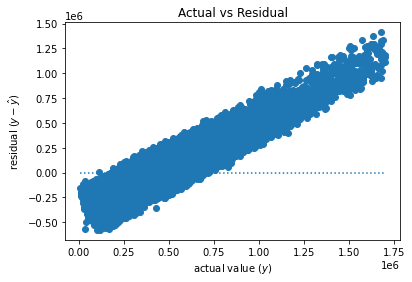

In [37]:
# Residual plot (y vs residual)
actual = y_train.taxvaluedollarcnt
predicted = df.yhat
residuals = actual - predicted
plt.hlines(0, actual.min(), actual.max(), ls=':')
plt.scatter(actual, residuals)
plt.ylabel('residual ($y - \hat{y}$)')
plt.xlabel('actual value ($y$)')
plt.title('Actual vs Residual')
plt.show()


In [38]:
# sum of residual is zero
df.residual.sum()

5.19677996635437e-07

In [39]:
# sum of baseline residual is zero too
df.baseline_residual.sum()

16309.0

In [40]:
df['residual^2'] = df.residual**2
df['baseline_residual^2'] = df.baseline_residual**2

df.head()

,calculatedfinishedsquarefeet,bathroomcnt,bedroomcnt,taxvaluedollarcnt,yhat,baseline,residual,baseline_residual,residual^2,baseline_residual^2
21620,1685.0,2.0,2.0,264846.0,455947.770099,384722,-191101.770099,-119876.0,3.651989e+10,1.437026e+10
2407,1030.0,2.0,3.0,153579.0,251325.152302,384722,-97746.152302,-231143.0,9.554310e+09,5.342709e+10
51380,1253.0,1.0,2.0,479773.0,334108.604749,384722,145664.395251,95051.0,2.121812e+10,9.034693e+09
41843,2034.0,3.0,4.0,634530.0,448620.263748,384722,185909.736252,249808.0,3.456243e+10,6.240404e+10
44774,1557.0,2.0,3.0,245376.0,371619.694414,384722,-126243.694414,-139346.0,1.593747e+10,1.941731e+10


In [41]:
SSE = df['residual^2'].sum()
SSE_baseline = df['baseline_residual^2'].sum()

print('SSE =', "{:.1f}".format(SSE))
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))

if SSE < SSE_baseline:
    print('SSE is better than baseline')
else:
    print('baseline is better')

SSE = 1527095485999349.5
SSE Baseline = 1852720624276517.0
SSE is better than baseline


In [42]:
len(df)
df.shape[0]

24248

In [43]:
MSE = SSE/len(df)
MSE_baseline = SSE_baseline/len(df)

print("MSE = ", "{:.1f}".format(MSE))
print("MSE baseline = ", "{:.1f}".format(MSE_baseline))

if MSE < MSE_baseline:
    print('MSE is better than baseline')
else:
    print('baseline is better')

MSE =  62978203810.6
MSE baseline =  76407152106.4
MSE is better than baseline


In [44]:
from math import sqrt
RMSE = sqrt(MSE)
RMSE_baseline =  sqrt(MSE_baseline)

if RMSE < RMSE_baseline:
    print('RMSE is better than baseline')
else:
    print('baseline is better')
    
print("RMSE = ", "{:.1f}".format(RMSE))
print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))

RMSE is better than baseline
RMSE =  250954.6
RMSE baseline =  276418.4


### Take away 276,XXX RMSE baseline  which beats the initial baseline of 384,722

In [46]:
if SSE < SSE_baseline:
    print('OLS regression model performs better than the baseline')
else:
    print('OLS regression model performs worse than the baseline')

OLS regression model performs better than the baseline


In [47]:
# sklearn.metrics.explained_variance_score

evs = explained_variance_score(df.taxvaluedollarcnt, df.yhat)
print('Explained Variance = ', round(evs,3))


Explained Variance =  0.176


In [48]:
# calculate R2 the easy way:
from sklearn.metrics import r2_score
r2_score(df.taxvaluedollarcnt, df.yhat)

0.17575512141517924

In [49]:
X2 = sm.add_constant(df.calculatedfinishedsquarefeet)
est = sm.OLS(df.taxvaluedollarcnt, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:      taxvaluedollarcnt   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     4646.
Date:                Thu, 09 Jun 2022   Prob (F-statistic):               0.00
Time:                        04:09:53   Log-Likelihood:            -3.3610e+05
No. Observations:               24248   AIC:                         6.722e+05
Df Residuals:                   24246   BIC:                         6.722e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [50]:
prepare.regression_errors(actual, predicted)

SSE     1.527095e+15
ESS     3.256251e+14
TSS     1.852721e+15
MSE     6.297820e+10
RMSE    2.509546e+05
dtype: float64

In [51]:
prepare.better_than_baseline(actual, predicted)

True

In [52]:
prepare.baseline_mean_errors(actual)

{'SSE': 1852720624265547.5,
 'MSE': 76407152105.96947,
 'RMSE': 276418.43662456644}

# Evaluate

### Can we visualize the better predictive models?

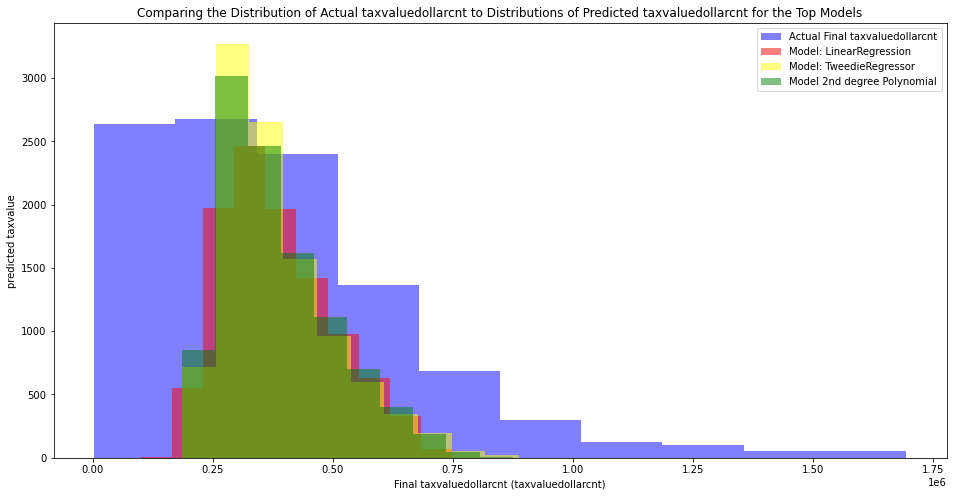

In [53]:
def actual_vs_predicted():
    # plot to visualize actual vs predicted. 
    plt.figure(figsize=(16,8))
    plt.hist(y_validate.taxvaluedollarcnt, color='blue', alpha=.5, label="Actual Final taxvaluedollarcnt")
    plt.hist(y_validate.taxvaluedollarcnt_pred_lm, color='red', alpha=.5, label="Model: LinearRegression")
    plt.hist(y_validate.taxvaluedollarcnt_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
    plt.hist(y_validate.taxvaluedollarcnt_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
    plt.xlabel("Final taxvaluedollarcnt (taxvaluedollarcnt)")
    plt.ylabel("predicted taxvalue")
    plt.title("Comparing the Distribution of Actual taxvaluedollarcnt to Distributions of Predicted taxvaluedollarcnt for the Top Models")
    plt.legend()
    plt.show()
actual_vs_predicted()

### Take away
- We can see here that the LinearRegression model seems to be the best fit for predicting

In [54]:
y_train

,taxvaluedollarcnt,taxvaluedollarcnt_pred_mean,taxvaluedollarcnt_pred_median,taxvaluedollarcnt_pred_lm,lm_residuals,taxvaluedollarcnt_pred_lars,lars_residuals,taxvaluedollarcnt_pred_glm,glm_residuals,taxvaluedollarcnt_pred_lm2,poly_residuals
21620,264846.0,384722.672592,337405.0,455947.770099,191101.770099,455335.887474,190489.887474,435015.529951,170169.529951,451170.650359,186324.650359
2407,153579.0,384722.672592,337405.0,251325.152302,97746.152302,251526.241591,97947.241591,271298.539003,117719.539003,251686.714350,98107.714350
51380,479773.0,384722.672592,337405.0,334108.604749,-145664.395251,333979.575199,-145793.424801,319697.897135,-160075.102865,328086.586744,-151686.413256
41843,634530.0,384722.672592,337405.0,448620.263748,-185909.736252,448608.335677,-185921.664323,438389.516539,-196140.483461,445107.647639,-189422.352361
44774,245376.0,384722.672592,337405.0,371619.694414,126243.694414,371587.505157,126211.505157,357751.582165,112375.582165,358147.611100,112771.611100
...,...,...,...,...,...,...,...,...,...,...,...
16906,56691.0,384722.672592,337405.0,277118.858675,220427.858675,277269.928086,220578.928086,287876.862597,231185.862597,273713.133245,217022.133245
13577,82676.0,384722.672592,337405.0,497038.604550,414362.604550,497056.071850,414380.071850,483247.672766,400571.672766,486118.286556,403442.286556
13023,81767.0,384722.672592,337405.0,458359.591953,376592.591953,458159.194255,376392.194255,436722.711458,354955.711458,440814.283683,359047.283683
46246,485955.0,384722.672592,337405.0,334542.036600,-151412.963400,334997.911374,-150957.088626,327978.794964,-157976.205036,331527.503318,-154427.496682


# Testing

In [55]:
metric_df = pd.DataFrame(data=[{
    'model': 'mean_baseline', 
    'RMSE_validate': rmse_validate,
        'r^2_validate': explained_variance_score(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_mean)}])

In [56]:
metric_df = metric_df.append({
    'model': 'OLS Regressor', 
    'RMSE_validate': rmse_validate_lm,
    'r^2_validate': explained_variance_score(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm)}, ignore_index=True)

In [57]:
metric_df = metric_df.append({
    'model': 'Lasso alpha 1', 
    'RMSE_validate': rmse_validate_lars,
    'r^2_validate': explained_variance_score(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lars)}, ignore_index=True)

In [58]:
metric_df = metric_df.append({
    'model': 'GLS (Poisson)', 
    'RMSE_validate': rmse_validate_glm,
    'r^2_validate': explained_variance_score(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_glm)}, ignore_index=True)

In [59]:
metric_df = metric_df.append({
    'model': 'Quadratic Model', 
    'RMSE_validate': rmse_validate_lm2,
    'r^2_validate': explained_variance_score(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm2)}, ignore_index=True)

In [60]:
metric_df   

,model,RMSE_validate,r^2_validate
0,mean_baseline,281425.871596,0.000000
1,OLS Regressor,254020.865949,0.160231
2,Lasso alpha 1,254020.750241,0.160232
3,GLS (Poisson),254229.363409,0.158831
4,Quadratic Model,253932.754702,0.160794


### takeaway
- linear regression model did the best

In [62]:
y_test = pd.DataFrame(y_test)

# predict on test
y_test['taxvaluedollarcnt_pred_LINEAR'] = lm.predict(X_test_scaled)

# evaluate: rmse
rmse_test_lm = mean_squared_error(y_test.taxvaluedollarcnt, y_test.taxvaluedollarcnt_pred_LINEAR)**(1/2)

print("RMSE for OLS Model using LinearRegression\nOut-of-Sample Performance: ", rmse_test_lm)


RMSE for OLS Model using LinearRegression
Out-of-Sample Performance:  253915.38250029655


In [63]:
y_test = pd.DataFrame(y_test)

# predict on test
y_test['taxvaluedollarcnt_pred_RMSE'] = lars.predict(X_test_scaled)

# evaluate: rmse
rmse_test_lars = mean_squared_error(y_test.taxvaluedollarcnt, y_test.taxvaluedollarcnt_pred_RMSE)**(1/2)

print("RMSE for OLS Model using Lasso\nOut-of-Sample Performance: ", rmse_test_lars)


RMSE for OLS Model using Lasso
Out-of-Sample Performance:  253918.8063731711


In [65]:
y_test = pd.DataFrame(y_test)

#predict on test
y_test['pred_Poly'] = lm2.predict(X_test_degree2)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.taxvaluedollarcnt, y_test.pred_Poly)**(0.5)

print(f"""
RMSE for Polynomial Regressor, degrees=2:
    
Test/Out-of-Sample Performance: {rmse_test}
""")


RMSE for Polynomial Regressor, degrees=2:
    
Test/Out-of-Sample Performance: 253649.04210148362



In [66]:
y_test

,taxvaluedollarcnt,taxvaluedollarcnt_pred_LINEAR,taxvaluedollarcnt_pred_RMSE,pred_Poly
42751,520519.0,637393.672338,637015.669583,651595.754259
21269,460811.0,317749.652785,317821.929822,309296.566246
25934,472963.0,378239.318174,378194.291956,364282.085912
47293,408687.0,346510.776706,346527.279365,335140.728040
50195,329291.0,404717.813212,404621.439155,389107.998238
...,...,...,...,...
47199,757000.0,538810.713101,538747.174758,529305.759848
50411,130016.0,583980.156486,583705.734717,590793.800585
46797,551000.0,450142.127975,449957.665814,432770.649838
13963,160633.0,227182.503127,227676.989669,248583.451383


### Take aways
- LinearRegression predictor seems to be the closest and the winner in this case for predicting price.

<AxesSubplot:>

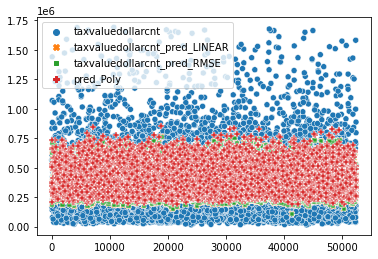

In [70]:
sns.scatterplot(data = y_test)

*** 

# Conclusion

### Major drivers of the house prices:
    
    calculatedfinishedsquarefeet,bedroomcnt, & bathroomcnt sit at the top as far as drivers of churn.It is a good idea to coniseder that the counties of ventura, Los Angeles, and Orange all have a wide range of homes that can be estimated up to 3 million dollars.The more bedrooms, bathrooms and living squarefeet a home has, the bigger the impact it will have on its price.


### Recommendations for the future:
    
    My recomendation to the zillow team, for future referance and for more accurate predictions; If I can be given more time to explore the data further so that we may be able to improve our predictions. By identifying more factors that drive home prices, we will increase our likelyhood that our predcition model will be more accurate. 
    
